In [22]:
include("readclassjson.jl")

data1 = readclassjson("constant_predictor.json")
y = data1["y"]

100-element Array{Float64,1}:
  0.14939226927547766 
  1.5800862402343645  
  0.6129576542811928  
 -1.088374804734564   
 -1.3159200275642549  
  0.8678154756616203  
 -0.39077721081326167 
  0.1513274800585327  
 -0.050118769587636613
  2.357159584143187   
 -0.5219639154651682  
  0.44767779495063065 
 -1.8104352639919683  
  ⋮                   
  2.623338911801641   
  0.791527423732082   
 -2.4060807079969138  
  0.24027786808511864 
  0.12040400930402073 
  1.311274132432773   
 -1.8696598319605893  
 -0.21627222106151    
 -1.357064145885513   
  2.679780085815154   
  0.36909012522840884 
  0.466996245882322   

In [23]:
# Question 2
# Quadratic Loss, constant predictor
theta_quad = sum(y) / length(y)
@show theta_quad

theta_quad = 0.6860678388851398

0.6860678388851398

In [24]:
# Absolute Loss, constant predictor
sorted_y = sort(y)
med1 = sorted_y[convert(Int, length(y)/2)]
med2 = sorted_y[convert(Int, (length(y)/2) + 1)]
theta_abs = (med1 + med2) / 2
@show theta_abs

theta_abs = 0.45733702041647634


0.45733702041647634

In [25]:
# Titlted Loss, tao = .25,  constant predictor
tao1 = 0.25
quart1a = sorted_y[convert(Int, length(y) / 4)]
quart1b = sorted_y[convert(Int, (length(y) / 4) + 1)]
theta_quart1 = (quart1a + quart1b) / 2
@show theta_quart1



theta_quart1 = -0.4327502216499973


-0.4327502216499973

In [26]:
# Titlted Loss, tao = .75,  constant predictor
tao2 = 0.75
quart3a = sorted_y[convert(Int, length(y) * 3 / 4)]
quart3b = sorted_y[convert(Int, (length(y)  * 3 / 4) + 1)]
theta_quart3 = (quart3a + quart3b) / 2
@show theta_quart3

theta_quart3 = 1.7425551932489234


1.7425551932489234

In [27]:
function tiltedLoss(y_hat, y, tao)
    if (y_hat - y) < 0
        return -tao * (y_hat - y)
    else
        return (1-tao) * (y_hat - y)
    end
end

tiltedLoss (generic function with 1 method)

In [28]:
quadLoss_mean = zeros(1, length(y))
quadLoss_med = zeros(1, length(y))
quadLoss_quart1 = zeros(1, length(y))
quadLoss_quart3 = zeros(1, length(y))

absLoss_mean = zeros(1, length(y))
absLoss_med = zeros(1, length(y))
absLoss_quart1 = zeros(1, length(y))
absLoss_quart3 = zeros(1, length(y))


tilt1Loss_mean = zeros(1, length(y))
tilt1Loss_med = zeros(1, length(y))
tilt1Loss_quart1 = zeros(1, length(y))
tilt1Loss_quart3 = zeros(1, length(y))

tilt2Loss_mean = zeros(1, length(y))
tilt2Loss_med = zeros(1, length(y))
tilt2Loss_quart1 = zeros(1, length(y))
tilt2Loss_quart3 = zeros(1, length(y))

for i = 1:length(y)
    # Quadratic Losses
    quadLoss_mean[i] = (theta_quad - y[i])^2
    quadLoss_med[i] = (theta_abs - y[i])^2
    quadLoss_quart1[i] = (theta_quart1 - y[i])^2
    quadLoss_quart3[i] = (theta_quart3 - y[i])^2
    
    # Abs Losses
    absLoss_mean[i] = abs(theta_quad - y[i])
    absLoss_med[i] = abs(theta_abs - y[i])
    absLoss_quart1[i] = abs(theta_quart1 - y[i])
    absLoss_quart3[i] = abs(theta_quart3 - y[i])
   
    # Tilted Losses Tao = 0.
    tilt1Loss_mean[i] = tiltedLoss(theta_quad, y[i], tao1)
    tilt1Loss_med[i] = tiltedLoss(theta_abs, y[i], tao1)
    tilt1Loss_quart1[i] = tiltedLoss(theta_quart1, y[i], tao1)
    tilt1Loss_quart3[i] = tiltedLoss(theta_quart3, y[i], tao1)
    
    # Tilted Losses Tao = 0.
    tilt2Loss_mean[i] = tiltedLoss(theta_quad, y[i], tao2)
    tilt2Loss_med[i] = tiltedLoss(theta_abs, y[i], tao2)
    tilt2Loss_quart1[i] = tiltedLoss(theta_quart1, y[i], tao2)
    tilt2Loss_quart3[i] = tiltedLoss(theta_quart3, y[i], tao2)
end



In [29]:
# Quadratic losses for each predictor
QL_QP = sum(quadLoss_mean) / length(quadLoss_mean)
QL_AP = sum(quadLoss_med) / length(quadLoss_med)
QL_Q1P = sum(quadLoss_quart1) / length(quadLoss_quart1)
QL_Q3P = sum(quadLoss_quart3) / length(quadLoss_quart3)

# Absolute losses for each predictor
AL_QP = sum(absLoss_mean) / length(absLoss_mean)
AL_AP = sum(absLoss_med) / length(absLoss_med)
AL_Q1P = sum(absLoss_quart1) / length(absLoss_quart1)
AL_Q3P = sum(absLoss_quart3) / length(absLoss_quart3)

# Tilted loss for each predictor, tao = .25
Q1L_QP = sum(tilt1Loss_mean) / length(tilt1Loss_mean)
Q1L_AP = sum(tilt1Loss_med) / length(tilt1Loss_med)
Q1L_Q1P = sum(tilt1Loss_quart1) / length(tilt1Loss_quart1)
Q1L_Q3P = sum(tilt1Loss_quart3) / length(tilt1Loss_quart3)

# Tilted loss for each predictor, tao = .75
Q3L_QP = sum(tilt2Loss_mean) / length(tilt2Loss_mean)
Q3L_AP = sum(tilt2Loss_med) / length(tilt2Loss_med)
Q3L_Q1P = sum(tilt2Loss_quart1) / length(tilt2Loss_quart1)
Q3L_Q3P = sum(tilt2Loss_quart3) / length(tilt2Loss_quart3)

table = ["Quad Loss" "Abs Loss" "Til Loss,Tao = .25" "Tilt Loss,Tao = .75";
                QL_QP        QL_AP                 QL_Q1P                     QL_Q3P         ;
                AL_QP        AL_AP                 AL_Q1P                     AL_Q3P         ;
                Q1L_QP        Q1L_AP                 Q1L_Q1P                     Q1L_Q3P     ;
                Q3L_QP        Q3L_AP                 Q3L_Q1P                     Q3L_Q3P     ;]

@show table

table = Any["Quad Loss" "Abs Loss" "Til Loss,Tao = .25" "Tilt Loss,Tao = .75"; 3.171033661087579 3.2233514484049226 4.422787513667184 4.287199191018165; 1.37687497205103 1.361862851061303 1.5744029105974358 1.7256950740694577; 0.688437486025515 0.6237487209134858 0.5074969401649336 1.126969375625675; 0.6884374860255151 0.7381141301478173 1.0669059704325021 0.5987256984437831]


5×4 Array{Any,2}:
  "Quad Loss"   "Abs Loss"   "Til Loss,Tao = .25"   "Tilt Loss,Tao = .75"
 3.17103       3.22335      4.42279                4.2872                
 1.37687       1.36186      1.5744                 1.7257                
 0.688437      0.623749     0.507497               1.12697               
 0.688437      0.738114     1.06691                0.598726              

In [30]:
using PrettyTables
pretty_table(table[2:5 , :], table[1, :])

┌────────────────────┬────────────────────┬────────────────────┬────────────── ⋯
│          Quad Loss │           Abs Loss │ Til Loss,Tao = .25 │ Tilt Loss,Tao ⋯
├────────────────────┼────────────────────┼────────────────────┼────────────── ⋯
│  3.171033661087579 │ 3.2233514484049226 │  4.422787513667184 │   4.287199191 ⋯
│   1.37687497205103 │  1.361862851061303 │ 1.5744029105974358 │  1.7256950740 ⋯
│  0.688437486025515 │ 0.6237487209134858 │ 0.5074969401649336 │   1.126969375 ⋯
│ 0.6884374860255151 │ 0.7381141301478173 │ 1.0669059704325021 │  0.5987256984 ⋯
└────────────────────┴────────────────────┴────────────────────┴────────────── ⋯


In [31]:
# Question 3
data2 = readclassjson("outlier_rem.json")
U_train = data2["U_train"]
v_train = data2["v_train"]
U_test = data2["U_test"]
v_test = data2["v_test"]

250-element Array{Float64,1}:
  1.7204127668177487 
 -1.3549759292493215 
  4.530924231742739  
 -0.7759758549010882 
 -1.1267665846388213 
 -2.1092109190314545 
 -1.2125486470187687 
  2.2333872226755083 
  2.3337230281536834 
 -1.9672924255975532 
 -0.12183561486256227
 -0.3384176654560345 
  1.0051236713175908 
  ⋮                  
 -2.4715102952153183 
  2.5441658935373255 
 -1.7768406884779093 
 -0.8380565076648329 
 -0.06739386130991289
  3.8136347265963435 
  2.4507781536564797 
 -0.4733452998950703 
  4.144330122610916  
 -3.0312305741535153 
 -3.774234981700489  
  5.177749088480776  

In [53]:
predictors = zeros(50, 10)

for i = 1:50
    theta = U_train \ v_train
    predictors[i, :] = theta
    
    largest = ((U_train[1, :] .* theta) .- v_train[1])
    toRemove = 1
    for j = 2:size(v_train)[1]
        if ((U_train[j, :] .* theta) .- v_train[j]) > largest
            toRemove = j
        end
    end
    
    U_train = U_train[setdiff(1:end, toRemove), :]
    v_train = v_train[setdiff(1:end, toRemove)]
    
end

In [63]:
using LinearAlgebra
errors = zeros(1, 50)

for k = 1:50
    v_predict = U_test .* predictors[k]
    errors[k] = norm(v_predict .- v_test) / sqrt(length(v_predict))
end
@show errors

errors = [2.9261885360953994 2.926185449185691 2.9262746752072006 2.9106807126275123 2.9108526547666322 2.9107957007074283 2.911271627364635 2.9107097686140917 2.9107539861402096 2.910845911721126 2.911151114785464 2.910492458266774 2.910528606249262 2.9104599135050915 2.911789674110145 2.911960417945851 2.9123407299164734 2.91326444722128 2.9131281509456612 2.912950969171773 2.9129461239472887 2.9127209506717393 2.913163949942776 2.913441022361058 2.9132343074804514 2.913170664735028 2.912444246075334 2.907421273409076 2.9074247091592955 2.907423630056595 2.907423520860547 2.9074322433578086 2.9074216453021235 2.9074262414480154 2.907424463252733 2.9074233359168336 2.9074225830370484 2.9074255412363126 2.9074222735695123 2.9074219750919315 2.9074518523992587 2.9074667989990672 2.907574188706417 2.907611043622923 2.907706554422388 2.907634743063791 2.907724957341612 2.907725046819383 2.907627521494561 2.9076058844552892]


1×50 Array{Float64,2}:
 2.92619  2.92619  2.92627  2.91068  …  2.90772  2.90773  2.90763  2.90761

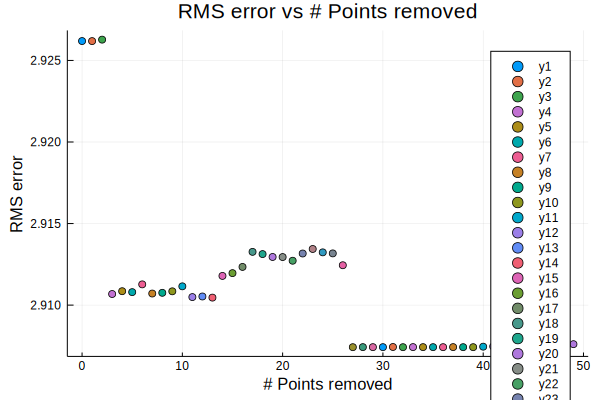

In [81]:
using Plots
numRemoved = range(0, stop =49, length=50)
scatter(numRemoved', errors)
ylabel!("RMS error")
xlabel!("# Points removed")
title!("RMS error vs # Points removed")

In [ ]:
# According to the chart above, it appears as if 25 of the data
# points have been corrupted, since RMS error appears constant after
# 25 points with the largest error are removed